<a href="https://colab.research.google.com/github/ProjetosCS/Titanic/blob/main/Trabalho_Pf_Titanic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
%matplotlib inline
import seaborn as sns

01) DataSet Titanic

In [3]:
titanic = pd.read_csv('titanic.data')
print(titanic)



     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


02 -Informações da Base.

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


03 - Renomeando as colunas

In [7]:
titanic.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'Qtde de Irmão/Conjuge', 'Qtde de Pais/Crianças','Bilhete', 'Tarifa', 'Cabine', 'Embarque']
titanic

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Qtde de Irmão/Conjuge,Qtde de Pais/Crianças,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


04 -Ajustando a coluna Sobreviveu.

In [8]:
titanic['Sobreviveu'] = titanic['Sobreviveu'].map({0:'Não',1:'Sim'})
titanic


,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Qtde de Irmão/Conjuge,Qtde de Pais/Crianças,Bilhete,Tarifa,Cabine,Embarque
0,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Não,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Não,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Sim,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,Não,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Sim,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


05- Alterando a informação da coluna Sexo.

In [9]:
titanic['Sexo'] = titanic['Sexo'].map({'female':'Mulher','male':'Homem'})

In [10]:
titanic

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Qtde de Irmão/Conjuge,Qtde de Pais/Crianças,Bilhete,Tarifa,Cabine,Embarque
0,1,Não,3,"Braund, Mr. Owen Harris",Homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Sim,3,"Heikkinen, Miss. Laina",Mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,35.0,1,0,113803,53.1000,C123,S
4,5,Não,3,"Allen, Mr. William Henry",Homem,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Não,2,"Montvila, Rev. Juozas",Homem,27.0,0,0,211536,13.0000,NaN,S
887,888,Sim,1,"Graham, Miss. Margaret Edith",Mulher,19.0,0,0,112053,30.0000,B42,S
888,889,Não,3,"Johnston, Miss. Catherine Helen ""Carrie""",Mulher,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Sim,1,"Behr, Mr. Karl Howell",Homem,26.0,0,0,111369,30.0000,C148,C


06- Quantidade de pessoas por Classe.

In [11]:
titanic.Classe.value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

07 - Quantidade de óbitos por classe.

O grafico abaixo mostra o total de óbitos por classe.


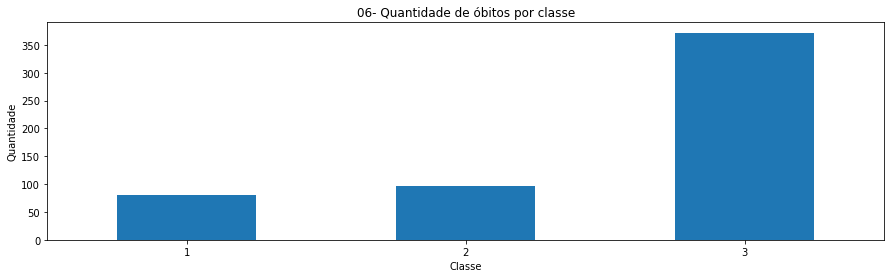

In [12]:
df_mortos = titanic[titanic['Sobreviveu']== 'Não'].groupby('Classe')
df_mortos['Sobreviveu'].count().plot(kind ='bar', title='06- Quantidade de óbitos por classe', rot=0,figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Quantidade')
print('O grafico abaixo mostra o total de óbitos por classe.')





08 - Quantidade de Sobreviventes por classe. No Gráfico abaixo mostra que o maior numero de sobreviventes pertencem a primeira Classe.

O grafico abaixo mostra o total de Sobreviventes por classe.


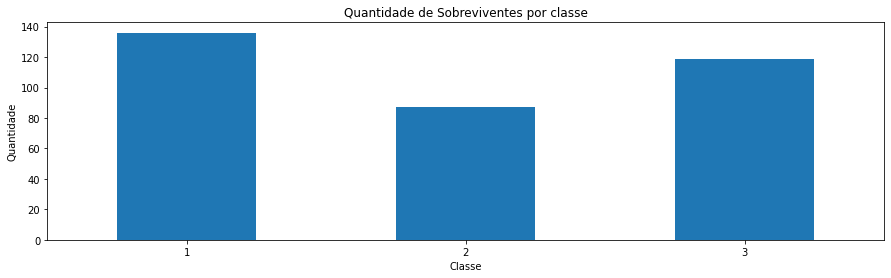

In [13]:
df_vivos = titanic[titanic['Sobreviveu']== 'Sim'].groupby('Classe')
df_vivos['Sobreviveu'].count().plot(kind ='bar', title='Quantidade de Sobreviventes por classe', rot=0,figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Quantidade')
print('O grafico abaixo mostra o total de Sobreviventes por classe.')

09-Percentual por Sexo.

(-1.1118283194882175,
 1.1005632897363742,
 -1.113598229981463,
 1.1076137555765018)

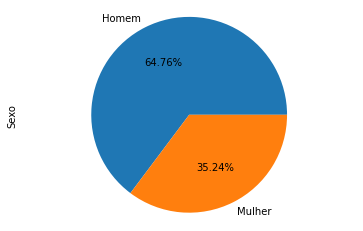

In [14]:
titanic.Sexo.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo




10- Percentual sobreviventes  classificando Crianças, Idosos.Grafico Abaixo mostra que o maior numero de sobreviventes são mulheres.

In [15]:
df_vivos = titanic[titanic['Sobreviveu']== 'Sim']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(-1.1010594079969478,
 1.1000504479998547,
 -1.1317439503832754,
 1.1104949751876891)

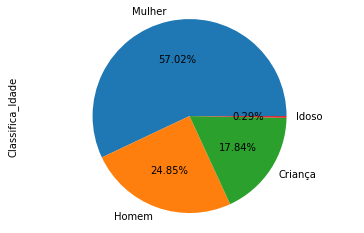

In [16]:

def Classifica_idade(row):
    if row.Idade < 18:
        return 'Criança' 
    elif row.Idade >= 65:
        return 'Idoso'
    return 'Homem' if row.Sexo == 'Homem'  else 'Mulher'
df_vivos['Classifica_Idade'] = df_vivos.apply(Classifica_idade, axis=1)
df_vivos.Classifica_Idade.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')    

11 - O Grafico abaixo apresenta o Valor da Tarifa por Cabine.

In [17]:
trace = go.Scatter(x = titanic['Cabine'],
                   y = titanic['Tarifa'],
                   mode = 'markers',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}},
                   opacity=.8)
data = [trace]
layout = go.Layout(title='Valor Tarifa por Cabine',
                   yaxis={'title':'Valor Tarifa '},
                   xaxis={'title': 'Cabine'})
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

12 - Analise abaixo mostra que as tarifas mais altas pertecem a primeira Classe.

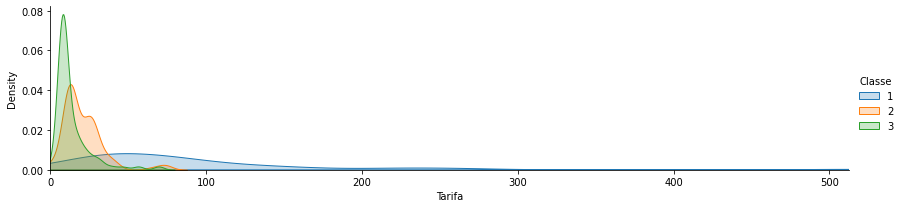

In [19]:
def plot_line_graph(x, hue):
    fig = sns.FacetGrid(titanic, hue=hue, aspect=4)
    fig.map(sns.kdeplot, x, shade=True)
    fig.set(xlim=(0, titanic[x].max()))
    fig.add_legend()
    return fig
plot_line_graph('Tarifa', 'Classe')

13 - Quantidades de Mulheres sobreviventes com valor de tarifas maior igual 100. Mostra que são da primeira Classe.

In [20]:
df = titanic[(titanic.Sexo == 'Mulher') & (titanic.Sobreviveu == 'Sim') & (titanic.Tarifa >= 100)]
qtd_sobrev = df.groupby(['Classe']).size() 
qtd_sobrev

Classe
1    32
dtype: int64

14 - Quantidades de Mulheres sobreviventes com valor de tarifas Menor 100. Mostra que são da primeira Classe.

In [154]:
df = titanic[(titanic.Sexo == 'Mulher') & (titanic.Sobreviveu == 'Sim') & (titanic.Tarifa < 100)]
qtd_sobrev = df.groupby(['Classe']).size() 
qtd_sobrev

Classe
1    59
2    70
3    72
dtype: int64

15 -Na analise abaixo nota-se que o maior numero de sobreviventes entre as mulheres pertencem a primeira classe

Text(0, 0.5, '')

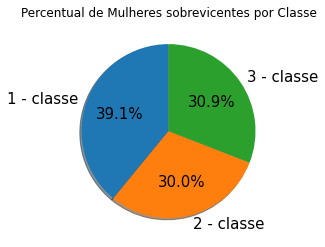

In [21]:
#Na analise abaixo nota-se que o maior numero de sobreviventes entre as mulheres pertencem a primeira classe 


Mulheres_Sobreviventes = titanic[(titanic.Sexo == 'Mulher') & (titanic.Sobreviveu == 'Sim')].groupby('Classe')
Mulheres_Sobreviventes['Sobreviveu'].value_counts().plot.pie(title = 'Percentual de Mulheres sobrevicentes por Classe',
                                                           labels=('1 - classe', '2 - classe', '3 - classe'),
                                                           fontsize=15, shadow=True, startangle=90, autopct='%1.1f%%',
                                                           figsize = (6,4)).set_ylabel('')